## Heart and related diseases study and prediction from Machine Learning Classification

## Import the librararies

In [513]:
#pip install plotly

In [514]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import matplotlib
from IPython.display import SVG

import plotly.express as px

from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



from sklearn.svm import SVC


import random 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Activation, Dense

 
from keras.utils.vis_utils import plot_model
 
#from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


from tensorflow.keras import Model
from keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model


from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE



from pathlib import Path
import glob
import logging

from IPython.display import Image


In [515]:
KFold

sklearn.model_selection._split.KFold

In [516]:
############## Size For all the graphs
plt.rcParams['figure.figsize'] = (14,6)
#############

# READ IN THE DATA

In [517]:
for name in glob.glob('data/*.*'):
    print(name)


data/Jaccard_sets_A_and_B.svg.png
data/heart.csv.xls
data/diabetes.csv
data/o2Saturation.csv.xls
data/cardio_train.csv


In [518]:
diabetes = pd.read_csv('data/diabetes.csv', index_col=0)
df = diabetes.copy()

In [519]:
df = df.reset_index()

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [521]:
diabetes.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1


In [522]:
diabetes.shape

(768, 8)

In [523]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [524]:
px.pie(df, names='Outcome',  title ="Outcome" , hole=0.8)

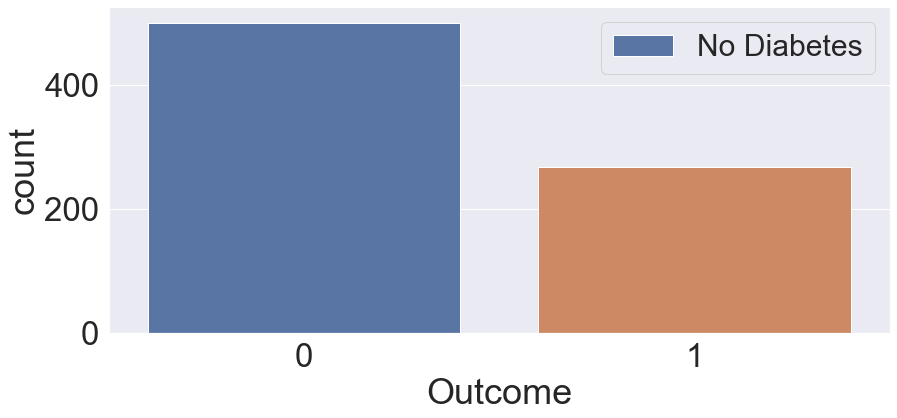

In [525]:
#sns.countplot(x ='Outcome', data = df, palette ="PiYG_r" )
sns.countplot(df['Outcome'],label="Count")
plt.legend(['No Diabetes','Disabetes'], fontsize=30)

(9.5, -0.5)

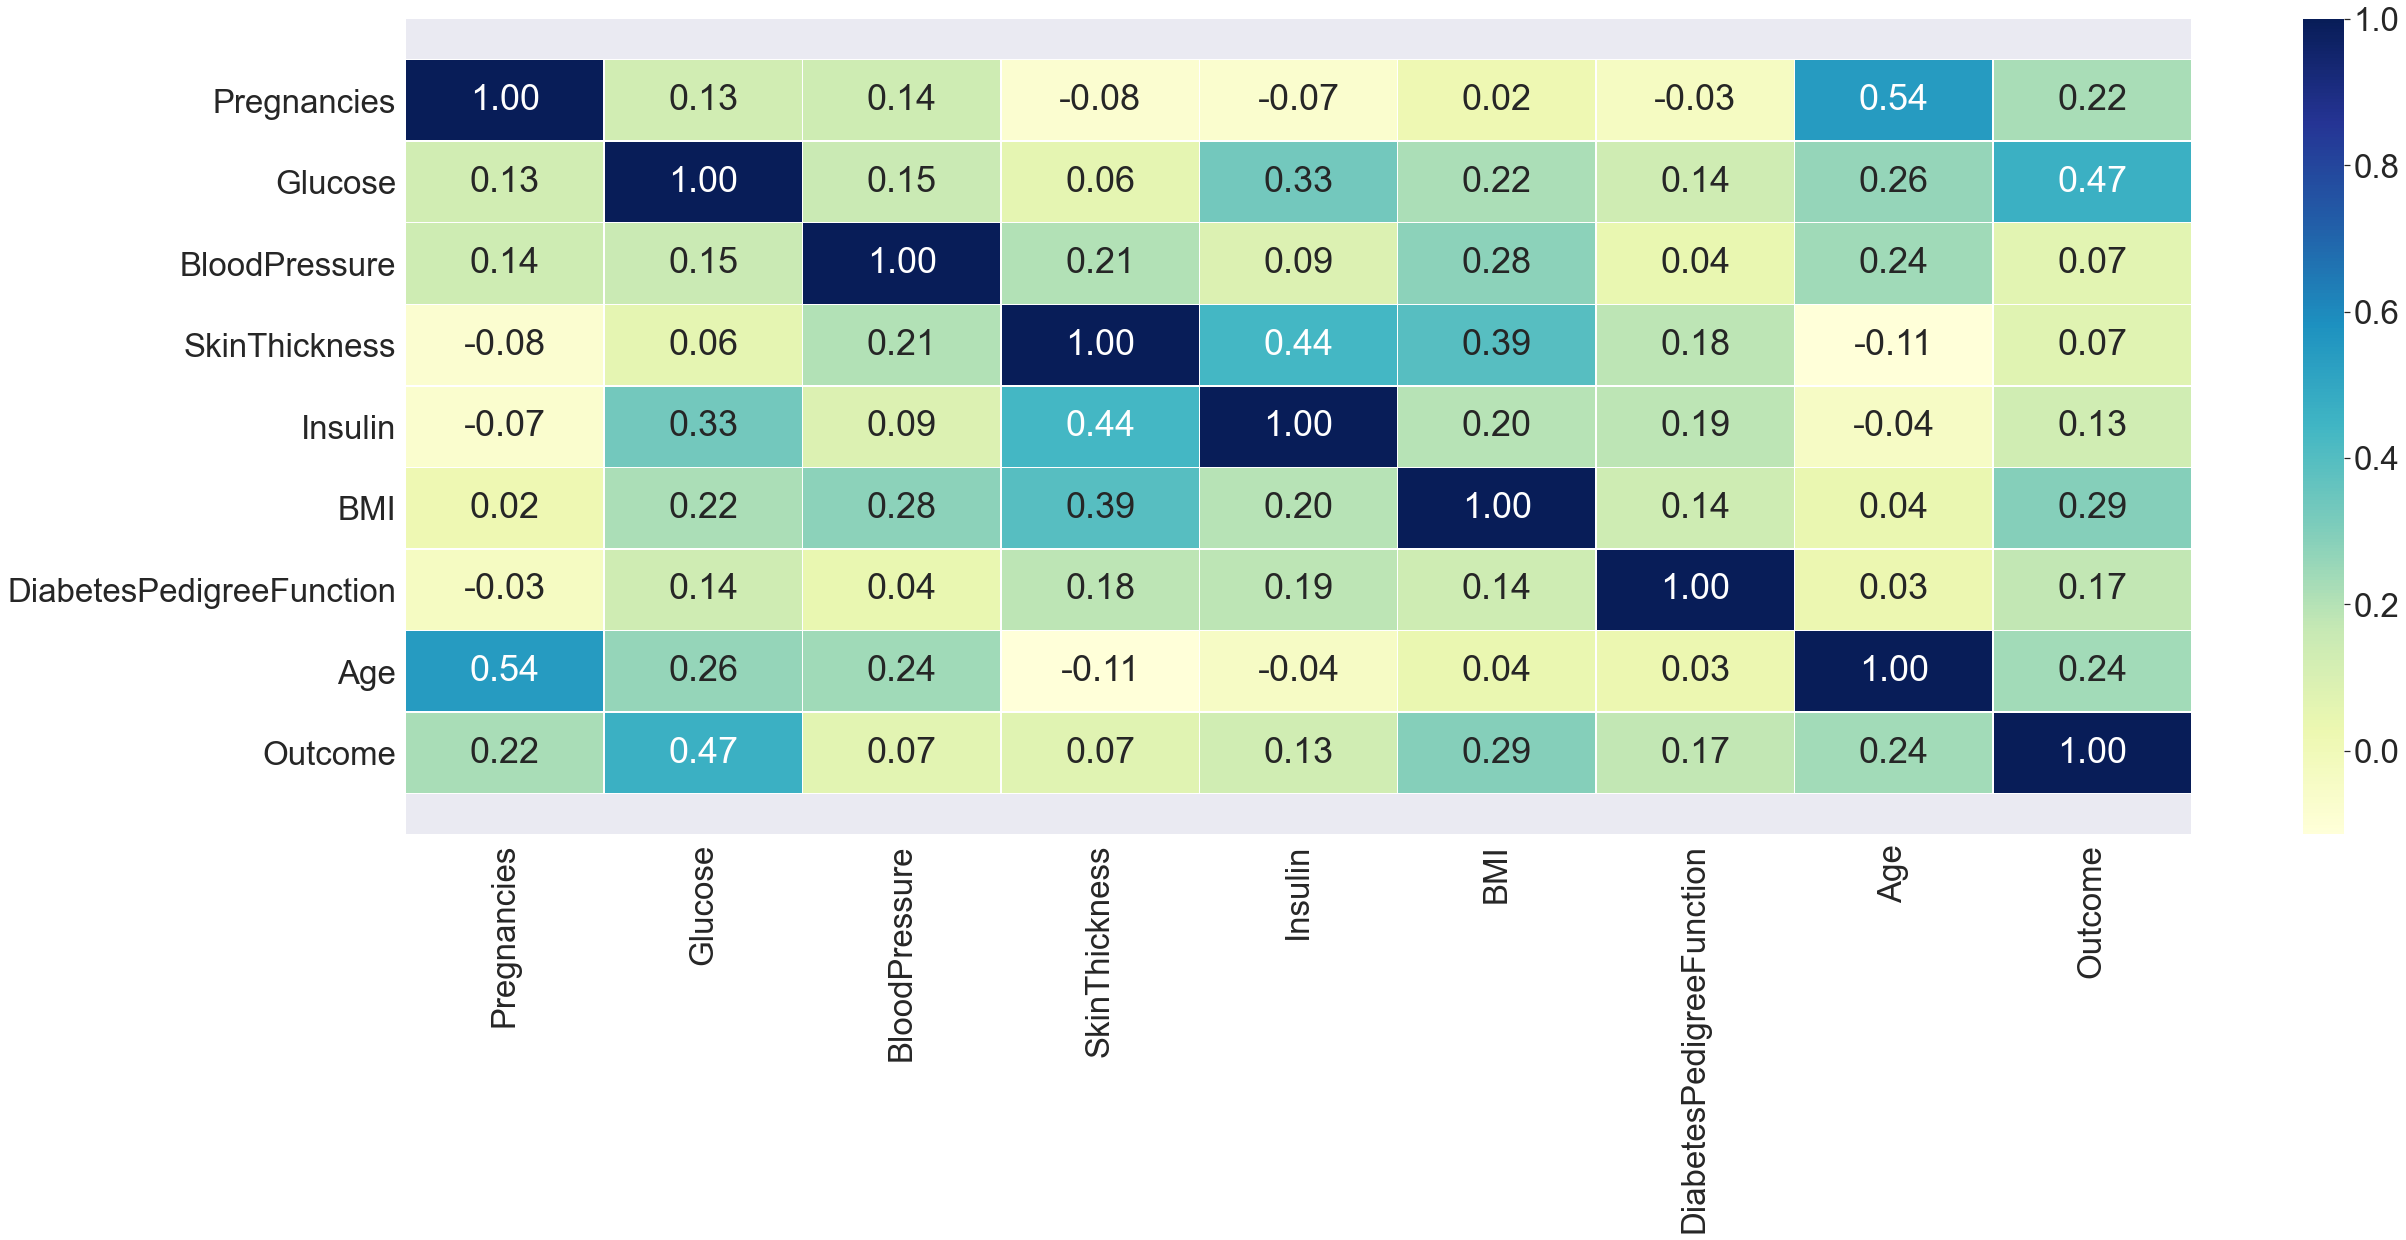

In [526]:
sns.set(font_scale = 3)
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize =(40,15 ) )
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)
 

In [527]:
df.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [528]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:title={'center':'Correlation with Target'}>

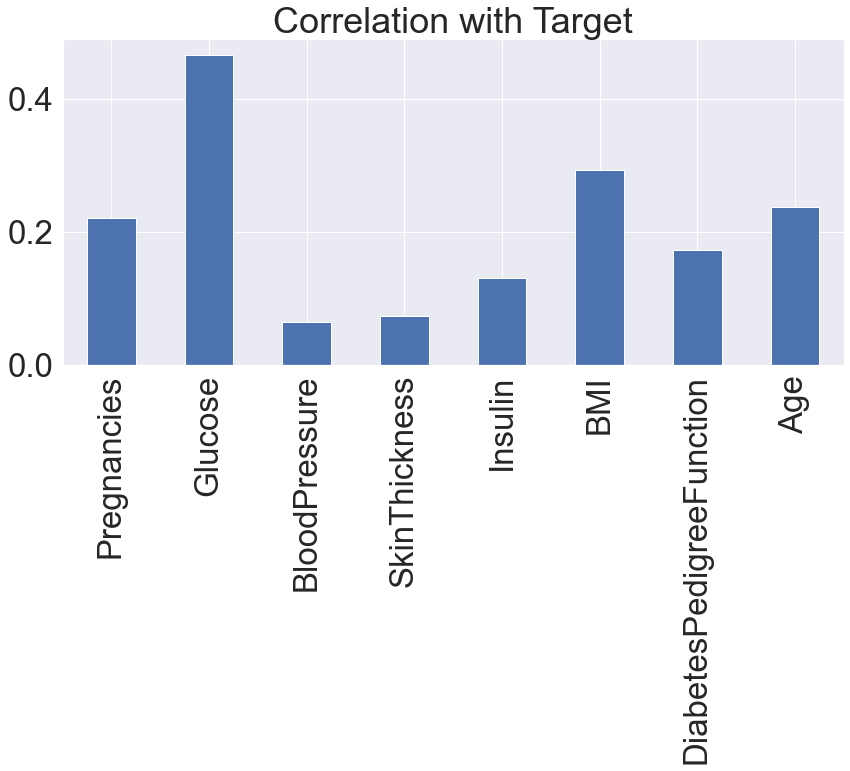

In [529]:


df.drop('Outcome', axis=1).corrwith(df.Outcome).plot(kind='bar' , grid=True, title="Correlation with Target")

In [530]:
 def plot_feature_importances_data(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_data(tree)
plt.savefig('feature_importance')

NameError: name 'tree' is not defined

<AxesSubplot:title={'center':'Correlation with BloodPressure'}>

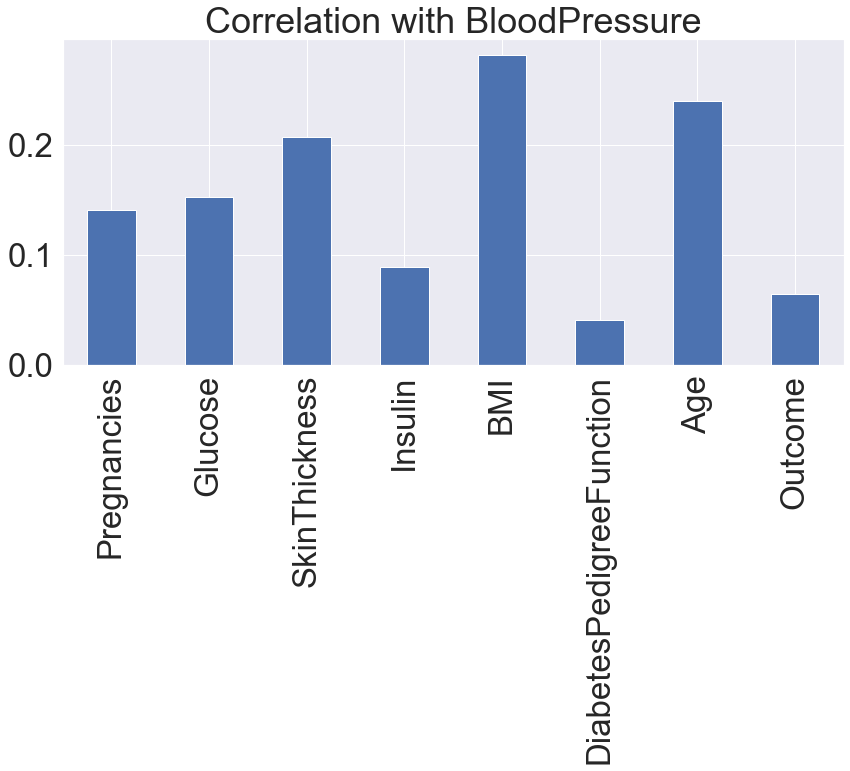

In [531]:
df.drop('BloodPressure', axis=1).corrwith(df.BloodPressure).plot(kind='bar' , grid=True, title="Correlation with BloodPressure")

<AxesSubplot:title={'center':'Correlation with Age'}, ylabel='freq.'>

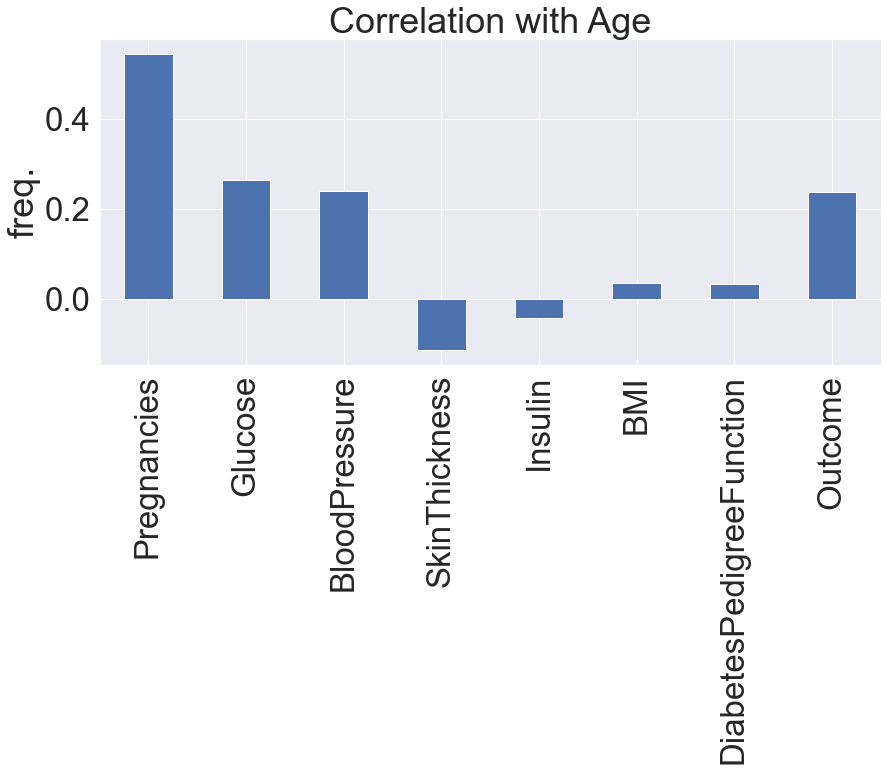

In [532]:
df.drop('Age', axis=1).corrwith(df.Age).plot(kind='bar' , grid=True, title="Correlation with Age", ylabel ='freq.')

<AxesSubplot:title={'center':'Correlation with SkinThickness'}, ylabel='Freq.'>

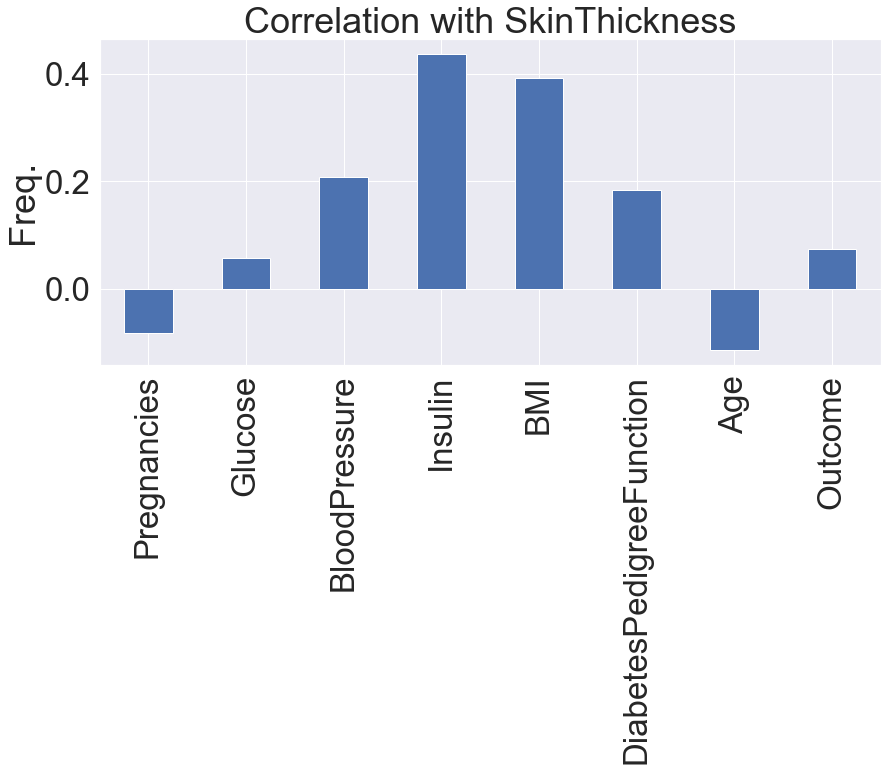

In [533]:
df.drop('SkinThickness', axis=1).corrwith(df.SkinThickness).plot(kind='bar' , grid=True, title="Correlation with SkinThickness",  ylabel ='Freq.')

<AxesSubplot:title={'center':'Correlation with Pregnancies'}>

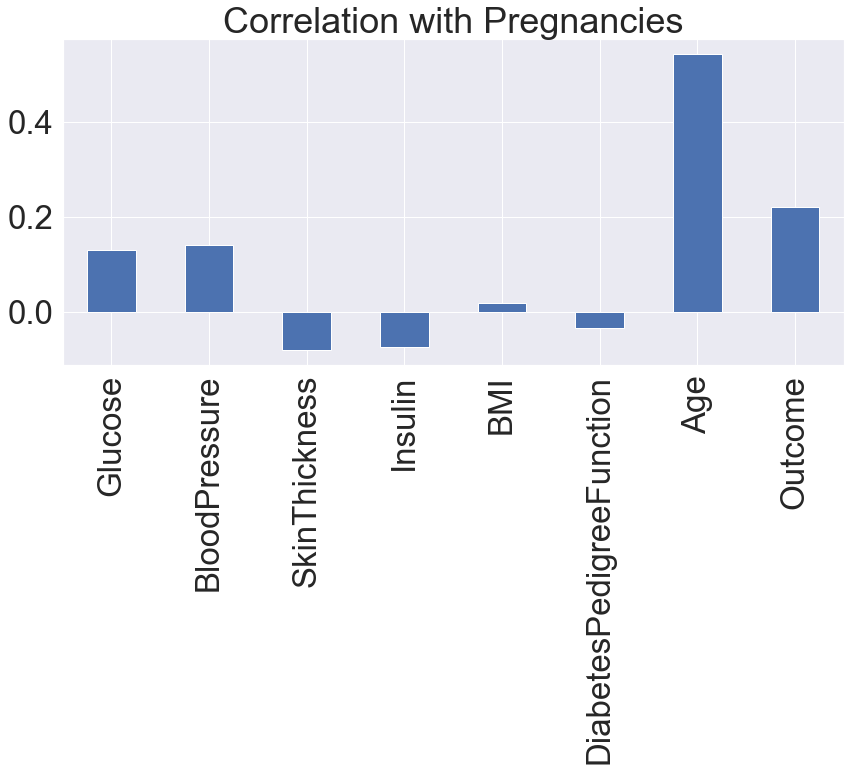

In [534]:
df.drop('Pregnancies', axis=1).corrwith(df.Pregnancies).plot(kind='bar' , grid=True, title="Correlation with Pregnancies")

In [535]:
#df = df.reset_index()

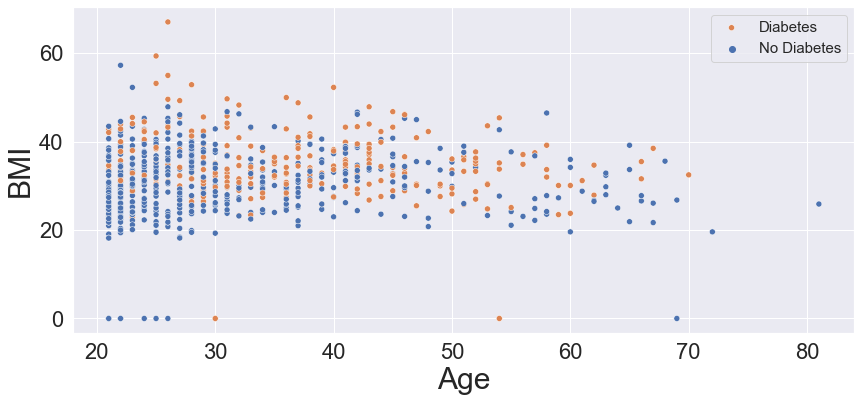

In [536]:
#plt.subplot(1,2,1)
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='Age',  y='BMI', hue='Outcome')
plt.xlabel('Age', fontsize=30)
plt.ylabel('BMI', fontsize=30)
plt.legend(['Diabetes','No Diabetes'], fontsize=15)

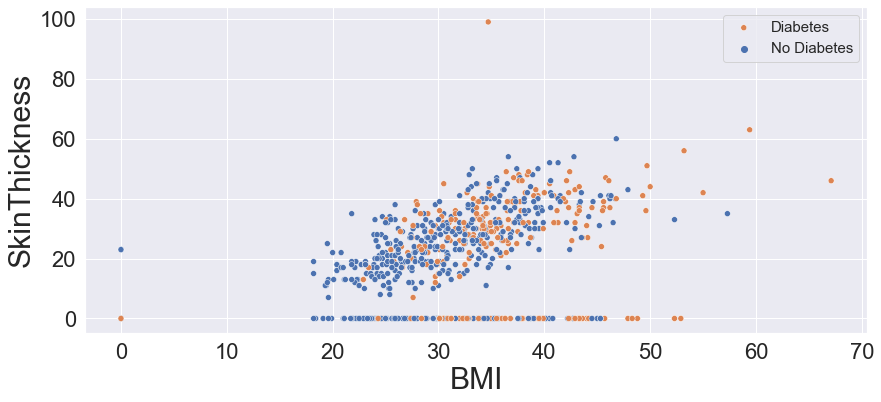

In [537]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='BMI',  y='SkinThickness', hue='Outcome')
plt.xlabel('BMI', fontsize=30)
plt.ylabel('SkinThickness', fontsize=30)
plt.legend(['Diabetes','No Diabetes'], fontsize=15)

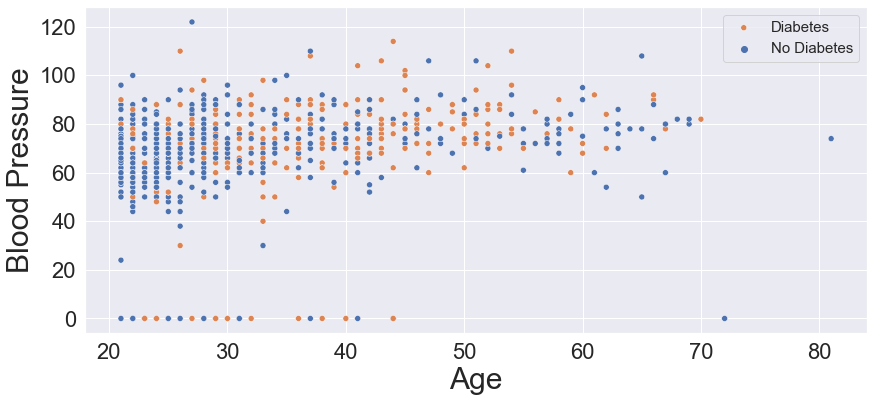

In [538]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='Age',  y='BloodPressure', hue='Outcome')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Blood Pressure', fontsize=30)
plt.legend(['Diabetes','No Diabetes'], fontsize=15)

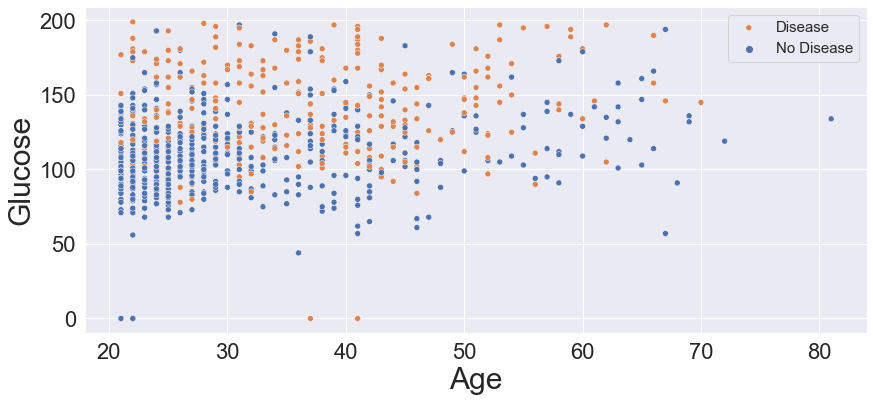

In [539]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='Age',  y='Glucose', hue='Outcome')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Glucose', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

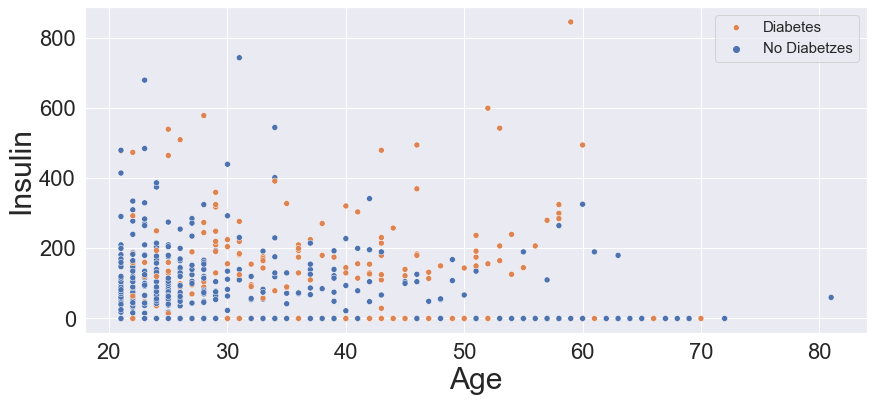

In [540]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='Age',  y='Insulin', hue='Outcome')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Insulin', fontsize=30)
plt.legend(['Diabetes','No Diabetzes'], fontsize=15)

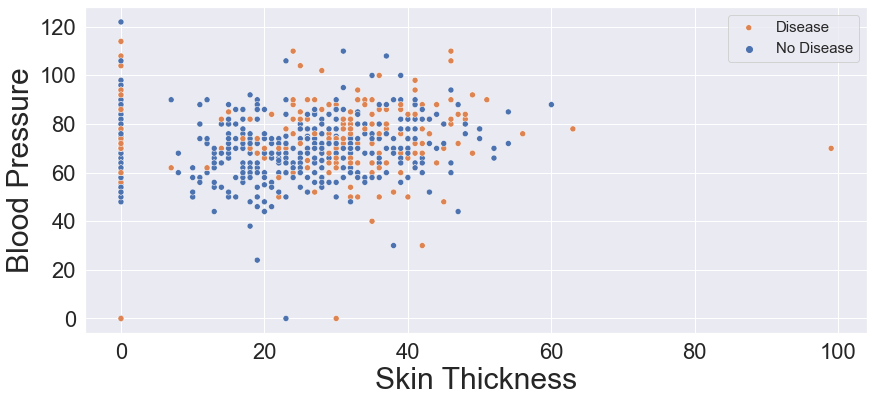

In [541]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='SkinThickness',  y='BloodPressure', hue='Outcome')
plt.xlabel('Skin Thickness', fontsize=30)
plt.ylabel('Blood Pressure', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

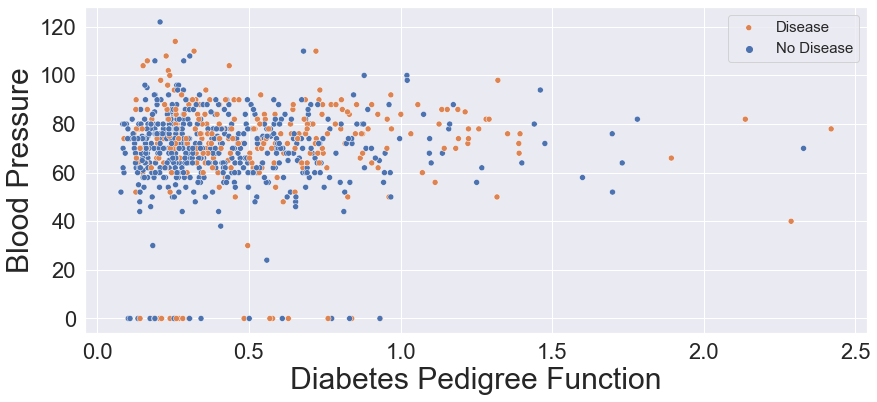

In [542]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='DiabetesPedigreeFunction',  y='BloodPressure', hue='Outcome')
plt.xlabel('Diabetes Pedigree Function', fontsize=30)
plt.ylabel('Blood Pressure', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

In [543]:
df.head(13)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [544]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

###  For plotting 

In [545]:
from sklearn.metrics import classification_report 


def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    #print(classification_report(y_test, y_pred), 3) # output accuracy
    #print confusion matrix
    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)

    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['no Diabetes',  'Diabetes']);
    ax.yaxis.set_ticklabels(['no Diabetes ', 'Diabetes'])
    return


In [546]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
y = df['Outcome']

# Logistic regression

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.74      0.67      0.71        52

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

How does model Logistic Regression score:
The accuracy of the model is: 0.812
The precision of the model is: 0.745
The recall of the model is: 0.673
The f1-score of the model is: 0.707
[[90 12]
 [17 35]]


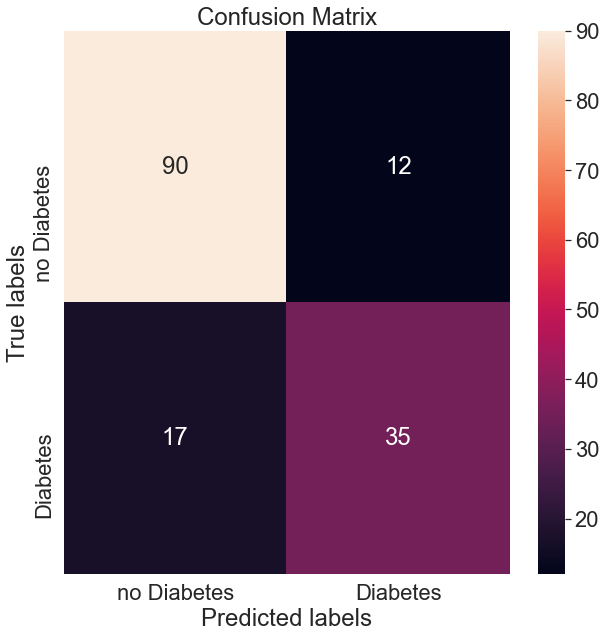

In [557]:
def LogRegfunc(X, y):
        # normalization of the datset
        X = preprocessing.StandardScaler().fit(X).transform(X)

        # Train-and-Test -Split
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

        mlg = LogisticRegression()
        mlg.fit(X_train, y_train)
        y_pred = mlg.predict(X_test)
#        Coef, Intg = mlg.coef_, mlg.intercept_
        glabel=  mlg.predict(X_train)
        prglabel = mlg.predict_proba(X_train)
        return X_test,  y_test, y_pred, glabel , prglabel, mlg  
X_test, y_test, y_pred, glabel , prglabel,   mlg= LogRegfunc(X, y)
print(classification_report(y_test, y_pred)) # output accuracy
print_evaluations(y_test, y_pred, 'Logistic Regression')


logReg_cm =    confusion_matrix(y_test, y_pred)
logReg_score =    round(mlg.score(X_test,y_test)*100)

In [558]:
(cross_val_score(mlg, X, y, cv=5)).mean() , (cross_val_score(mlg, X, y, cv=5)).std() 

(0.7682624564977505, 0.026330627985932244)

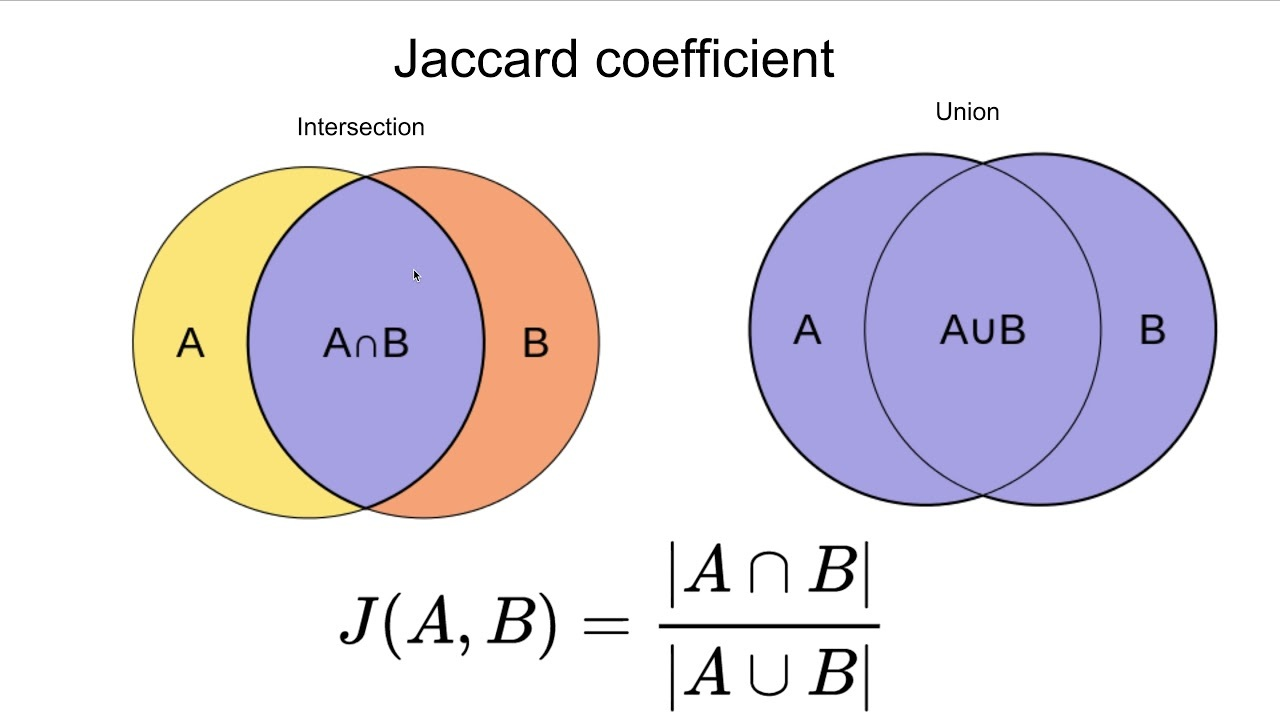

In [549]:
Image(filename='data/Jaccard_sets_A_and_B.svg.png',width=400)

In [550]:
print('Accuracy of the model in jaccard similarity score is = ', jaccard_score(y_test, y_pred))

Accuracy of the model in jaccard similarity score is =  0.546875


In [ ]:
LogReg_cm =    confusion_matrix(y_test, y_pred)
logReg_score =    round(mlg.score(X_test,y_test)*100)

### Logistic regression coefficients 

In [551]:
 mlg.coef_, mlg.intercept_

(array([[ 0.45473393,  0.97558381, -0.29235286,  0.00963133, -0.03917234,
          0.70819416,  0.38836837,  0.22975039]]),
 array([-0.834576]))

In [552]:
#pd.DataFrame(mlg.coef_).T.hist()


Text(0.5, 1.0, 'Coefficients vs frequency')

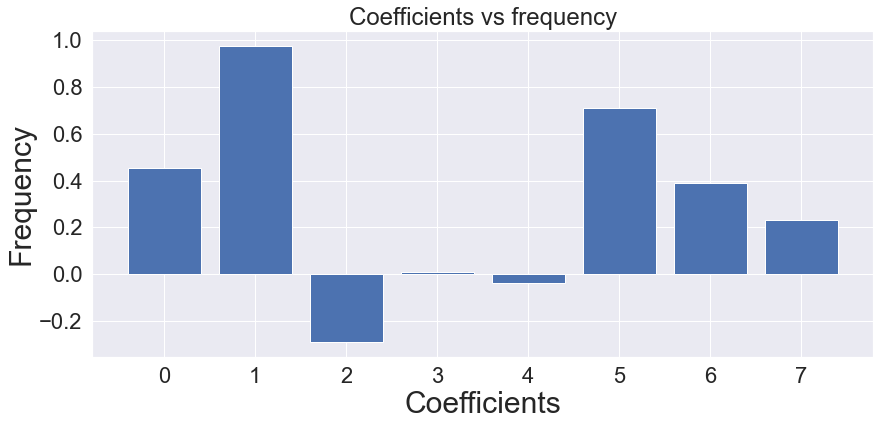

In [428]:
plt.bar(range(8),  mlg.coef_[0])
plt.xlabel('Coefficients', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('Coefficients vs frequency')

# Train the model decison tree

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       375
           1       0.78      0.80      0.79       201

    accuracy                           0.85       576
   macro avg       0.83      0.84      0.84       576
weighted avg       0.85      0.85      0.85       576

How does model Decision tree classifier  score:
The accuracy of the model is: 0.851
The precision of the model is: 0.78
The recall of the model is: 0.796
The f1-score of the model is: 0.788
[[330  45]
 [ 41 160]]


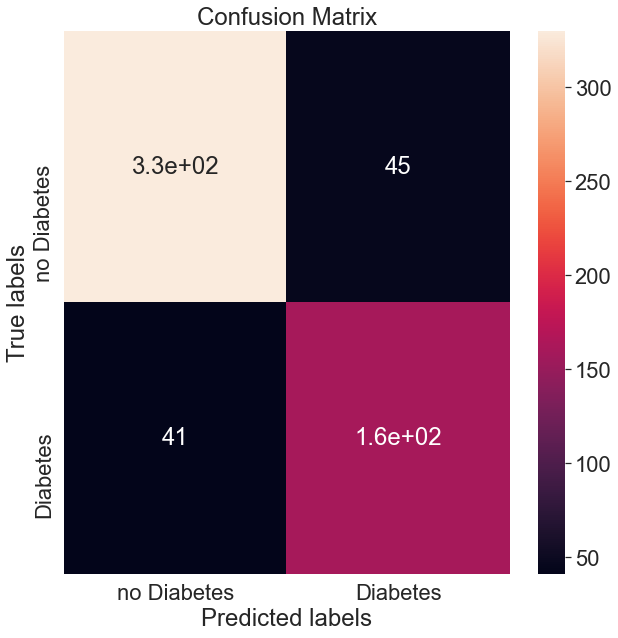

In [564]:
####Decision tree classifier######

def  DecisionTreeCfun(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        mtr = DecisionTreeClassifier(max_depth=5)   #Hyperparameters -> there are many more you can try out against overfitting
        mtr.fit(X_train, y_train)
        y_pred = mtr.predict(X_train)   # prediction
        mtr.score(X_train, y_train)
        return X_test, y_test, y_pred, y_train, mtr
    
X_test, y_test, y_pred, y_train, mtr = DecisionTreeCfun(X,y)
print(classification_report(y_train, y_pred)) # output accuracy

print_evaluations(y_train, y_pred, 'Decision tree classifier ')

 
decisson_Tree_cm =    confusion_matrix(y_train, y_pred)
decisson_Tree_score =  round(mtr.score(X_test,y_test)*100)

In [566]:
(cross_val_score(mtr, X, y, cv=5)).mean() , (cross_val_score(mtr, X, y, cv=5)).std() 

(0.7474747474747474, 0.03497162207037517)

In [565]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

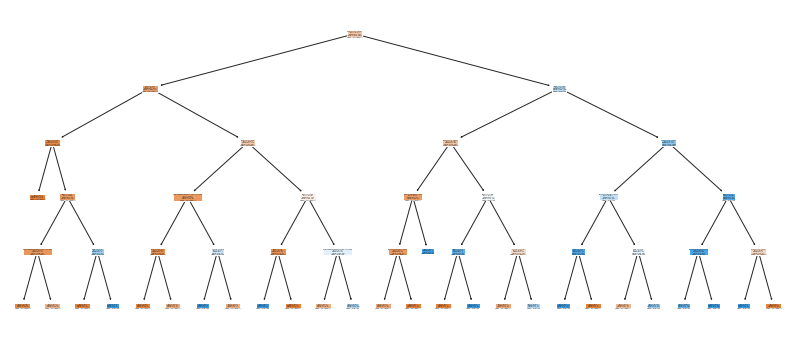

In [512]:
plot_tree(mtr, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], class_names=['no diabetes','diabetes'], filled =True  );


# Challenge: Beat Kristians Baseline Model  

In [433]:
df['Outcome'].value_counts() 

0    500
1    268
Name: Outcome, dtype: int64

### super primitive output "all have diseases"

In [434]:
prediction=[0]*768    ###super primitive output "all have diseases"

In [435]:
correct = 268
total = 268+500

accuracy = correct/total
accuracy, total

(0.3489583333333333, 768)

### second base line model: super primitive 'coin toss model'

In [436]:
prediction =[random.choice([0,1]) for i in range (768)]

In [437]:
accuracy_score(df['Outcome'], prediction)

0.4908854166666667

## Building the baseline model

In [438]:
def baseline(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        ypred_baseline = [1] * len(y_train.values)
        return ypred_baseline,y_train

How does model Baseline Model score:
The accuracy of the model is: 0.349
The precision of the model is: 0.349
The recall of the model is: 1.0
The f1-score of the model is: 0.517
[[  0 375]
 [  0 201]]


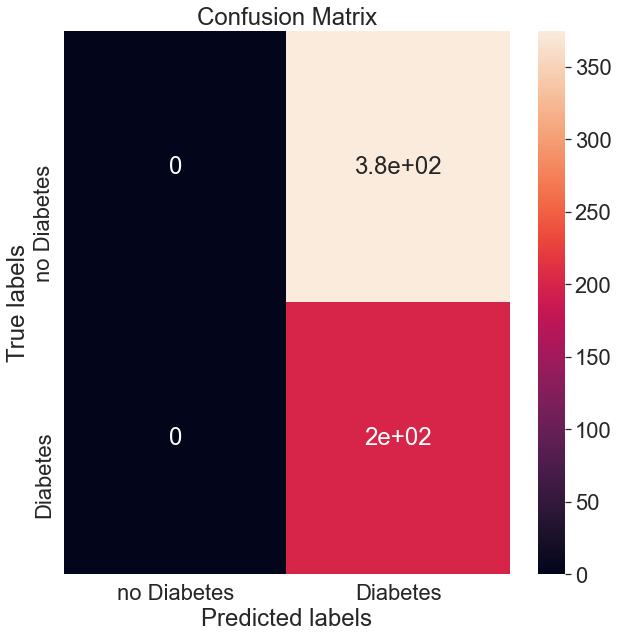

In [439]:
ypred_baseline,y_train = baseline(X,y)
#generating predictions of all ones, i.e. the model guesses  DISEASES  for all cases.
print_evaluations(y_train, ypred_baseline, 'Baseline Model')

## Compare it to a random forest classifier

In [440]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       125
           1       0.83      0.57      0.67        67

    accuracy                           0.81       192
   macro avg       0.81      0.75      0.77       192
weighted avg       0.81      0.81      0.80       192

How does model RandomForest score:
The accuracy of the model is: 0.807
The precision of the model is: 0.826
The recall of the model is: 0.567
The f1-score of the model is: 0.673
[[117   8]
 [ 29  38]]


77

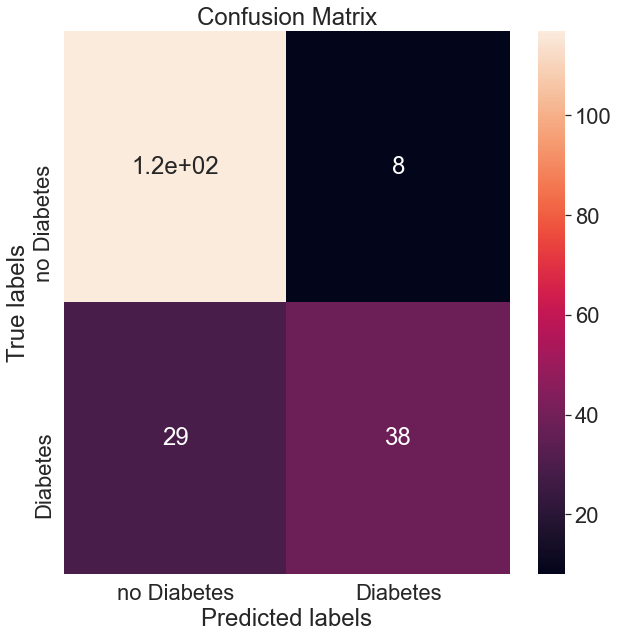

In [584]:
def RandomForestfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)
        rf.fit(X_train, y_train)
        ypred_rf = rf.predict(X_test)
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        return ypred_rf,X_test, y_test, cv_all, training_score
ypred_rf, X_test, y_test, cv_all , training_score = RandomForestfunc(X,y)
print(classification_report(y_test, ypred_rf)) # output accuracy
print_evaluations(y_test, ypred_rf, 'RandomForest')

random_forest_cm =    confusion_matrix(y_test, ypred_rf)
random_forest_score =   round(mtr.score(X_test,y_test)*100)
random_forest_score

In [586]:
 (cross_val_score(rf, X, y, cv=5)).mean() , (cross_val_score(rf, X, y, cv=5)).std() 

(0.7591715474068416, 0.02954699746889511)

# Methods to improve: Use Undersampling

In [444]:
(y_train == 0).sum(), (y_train == 1).sum()

(375, 201)

In [445]:
def  RanSamplerfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        #print((y_train == 0).sum(), (y_train == 1).sum())
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)


        rus = RandomUnderSampler(sampling_strategy={0:300},random_state=10)
        #This is  modified depending on the number of samples
        # we are asking for 95 data points out of 103 in the first class. ## (y_train == 0).sum(), (y_train == 1).sum()

        nm = NearMiss(sampling_strategy={0: 95}) ####  This is modified depending on the number of samples.
                                                ####(y_train == 0).sum(), (y_train == 1).sum()


        X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
        #fit_resample() new imblearn syntax
        #very conceptually similar to .fit_transform() <---sklearn

        X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)


        ### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled
        rf.fit(X_train_rus, y_train_rus)
        ypred_rus = rf.predict(X_test)

        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)

        return ypred_rus, y_test, X_train_nm, y_train_nm, X_test, X_train, cv_all, training_score


How does model Random Undersampling score:
The accuracy of the model is: 0.833
The precision of the model is: 0.797
The recall of the model is: 0.701
The f1-score of the model is: 0.746
[[113  12]
 [ 20  47]]


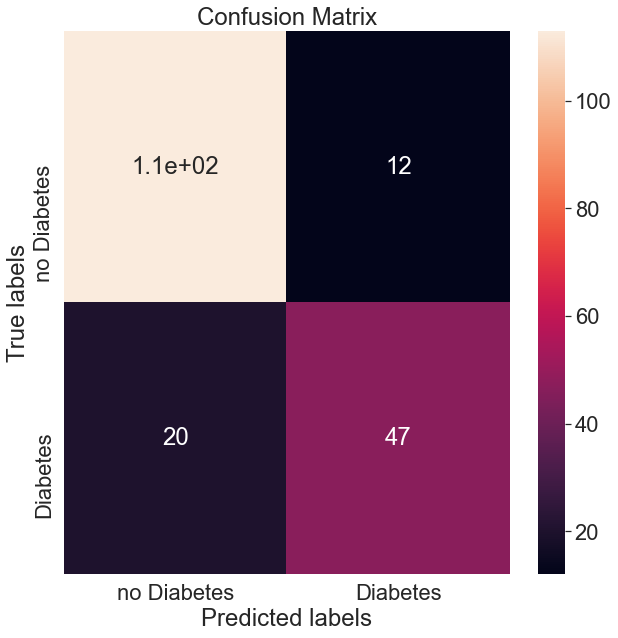

In [446]:
ypred_rus, y_test, X_train_nm, y_train_nm, X_test , X_train, cv_all, training_score =RanSamplerfunc(X,y)
print_evaluations(y_test, ypred_rus, 'Random Undersampling')

In [447]:
cv_all, cv_all.mean(), training_score

(array([0.74137931, 0.73913043, 0.73913043, 0.7826087 , 0.75652174]),
 0.7517541229385307,
 0.7916666666666666)

#  Near Miss

How does model Near Miss score:
The accuracy of the model is: 0.615
The precision of the model is: 0.473
The recall of the model is: 0.925
The f1-score of the model is: 0.626
[[56 69]
 [ 5 62]]


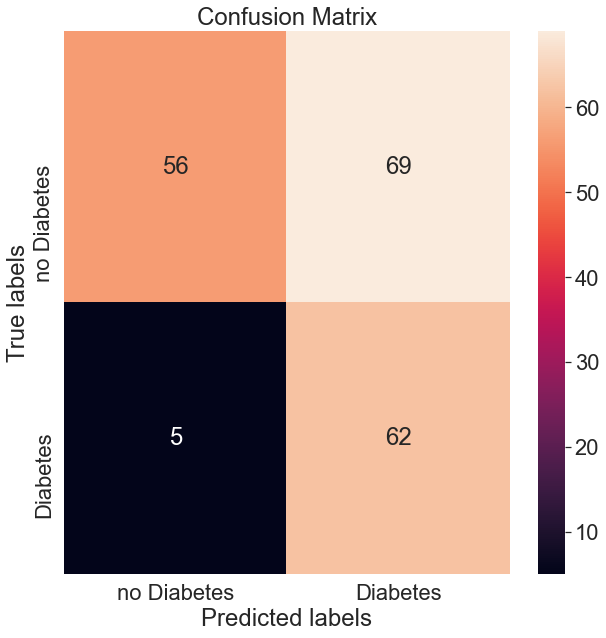

In [448]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=10)
rf.fit(X_train_nm, y_train_nm)
ypred_nm = rf.predict(X_test)        

cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
training_score = rf.score(X_train,y_train)



print_evaluations(y_test, ypred_nm, 'Near Miss')

In [449]:
cv_all, cv_all.mean(), training_score

(array([0.71551724, 0.73913043, 0.74782609, 0.79130435, 0.77391304]),
 0.7535382308845577,
 0.6423611111111112)

#  Over samplimng  SMOTE 

In [450]:

def  OverSamplerfunc(X,y,rf):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        print((y_train == 0).sum(), (y_train == 1).sum())
        ros= RandomOverSampler(random_state=10,sampling_strategy={1:850})
        #up-sampling--- the minority class to have 520  instead

        X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
        # Exact same code as before, but this time we are training
        #cthe Random Forest on the undersampled  / down-sampled data using Near Miss

        rf.fit(X_train_ros, y_train_ros)
        ypred_ros = rf.predict(X_test)
        
        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        
        
        return ypred_ros, y_test,  cv_all, training_score 



375 201
How does model Random Oversampling score:
The accuracy of the model is: 0.688
The precision of the model is: 0.531
The recall of the model is: 0.896
The f1-score of the model is: 0.667
[[72 53]
 [ 7 60]]


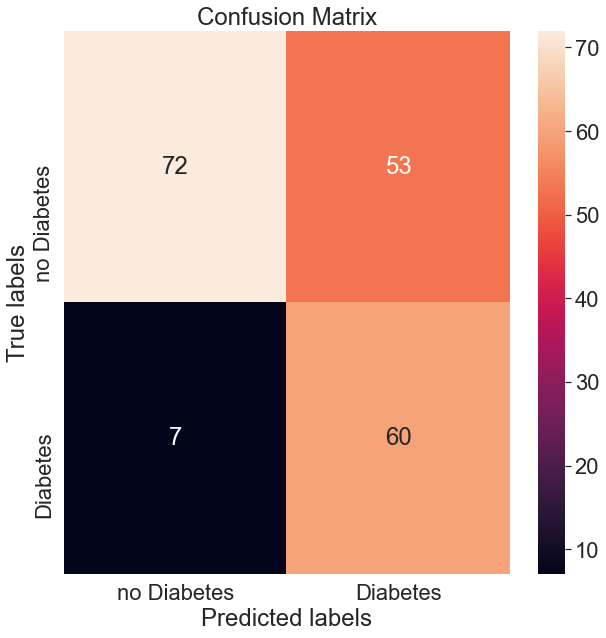

In [451]:
ypred_ros, y_test,  cv_all, training_score = OverSamplerfunc(X,y,rf)
print_evaluations(y_test, ypred_ros, 'Random Oversampling')


In [452]:
cv_all, cv_all.mean(), training_score

(array([0.71551724, 0.73913043, 0.74782609, 0.79130435, 0.77391304]),
 0.7535382308845577,
 0.7569444444444444)

In [453]:
df.shape

(768, 9)

# Naives Bayes Classifier

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

How does model NBC score:
The accuracy of the model is: 0.792
The precision of the model is: 0.674
The recall of the model is: 0.617
The f1-score of the model is: 0.644
[[93 14]
 [18 29]]


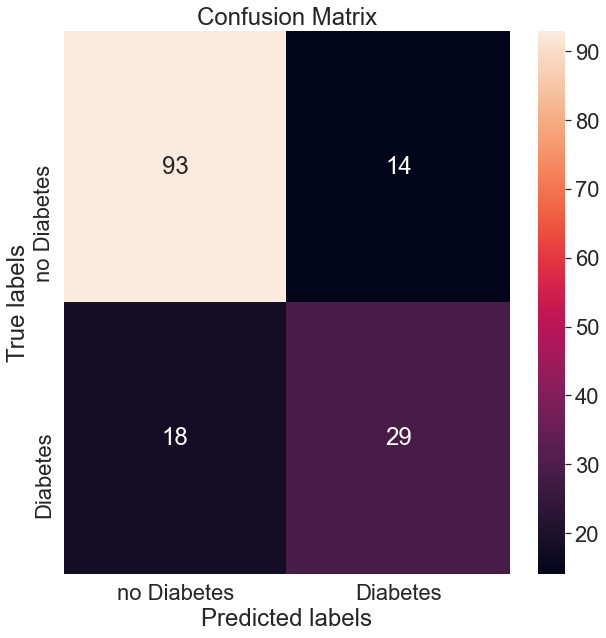

In [573]:
def  Naives_Bayes_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model_nbc = GaussianNB() # get instance of model
    model_nbc.fit(X_train, y_train) # Train/Fit model 
    y_pred_nbc = model_nbc.predict(X_test) # get y predictions
    X_test_nbc = X_test
    y_test_nbc =y_test
    
    return X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc

X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc = Naives_Bayes_classifier(X,y)
print(classification_report(y_test_nbc, y_pred_nbc)) # output accuracy
print_evaluations(y_test_nbc, y_pred_nbc, 'NBC')

Naives_Bayes_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
Naives_Bayes_score =  round(model_nbc.score(X_test_nbc,y_test_nbc)*100)
  

In [574]:
(cross_val_score(model_nbc, X, y, cv=5)).mean() , (cross_val_score(model_nbc, X, y, cv=5)).std() 

(0.7513368983957219, 0.018601807594185577)

# SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       107
           1       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

How does model SVM score:
The accuracy of the model is: 0.792
The precision of the model is: 0.703
The recall of the model is: 0.553
The f1-score of the model is: 0.619
[[96 11]
 [21 26]]


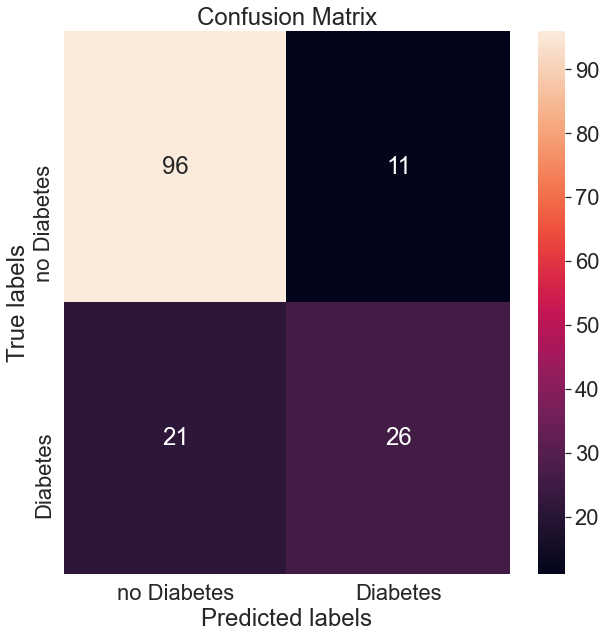

In [579]:
def SupportVectorMachine(X,y):
    #splity X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_svm = SVC(random_state=1) # get instance of model
    model_svm.fit(X_train, y_train) # Train/Fit model 
    
    y_pred_svm = model_svm.predict(X_test) # get y predictions
    X_test_svm =X_test
    y_test_svm =  y_test
    return X_test_svm, y_test_svm,  y_pred_svm, model_svm

X_test_svm, y_test_svm,  y_pred_svm, model_svm= SupportVectorMachine(X,y)

print(classification_report(y_test_svm, y_pred_svm)) # output accuracy
print_evaluations(y_test_svm, y_pred_svm, 'SVM') 

SupportVectorMachine_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
SupportVectorMachine_score =  round(model_svm.score(X_test_svm, y_test_svm)*100)
 

In [577]:
(cross_val_score(model_svm, X, y, cv=5)).mean() , (cross_val_score(model_svm, X, y, cv=5)).std() 

(0.7591460826754943, 0.020217403744815586)

#  K-NN (K-Nearest Neighbors)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

How does model K-NN score:
The accuracy of the model is: 0.799
The precision of the model is: 0.682
The recall of the model is: 0.638
The f1-score of the model is: 0.659
[[93 14]
 [17 30]]


80

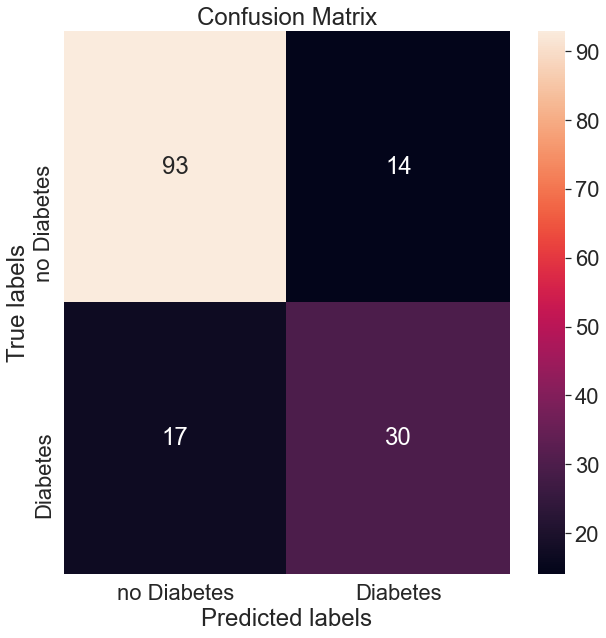

In [580]:
def  K_NEAREST_NEIGHBORS_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_knn = KNeighborsClassifier() # get instance of model
    model_knn.fit(X_train, y_train) # Train/Fit model 
    y_pred_knn = model_knn.predict(X_test) # get y predictions
    X_test_knn = X_test
    y_test_knn =  y_test
    return X_test_knn,  y_test_knn, y_pred_knn, model_knn
X_test_knn, y_test_knn, y_pred_knn , model_knn  =   K_NEAREST_NEIGHBORS_classifier(X,y)
print(classification_report(y_test_knn, y_pred_knn)) # output accuracy  
print_evaluations(y_test_knn, y_pred_knn, 'K-NN')


K_NEAREST_NEIGHBORS_cm =    confusion_matrix(y_test_knn, y_pred_knn)
K_NEAREST_NEIGHBORS_score =  round(model_knn.score(X_test_knn, y_test_knn)*100)
 

In [581]:
(cross_val_score(model_knn, X, y, cv=5)).mean() , (cross_val_score(model_knn, X, y, cv=5)).std() 

(0.723979288685171, 0.020162350427575554)

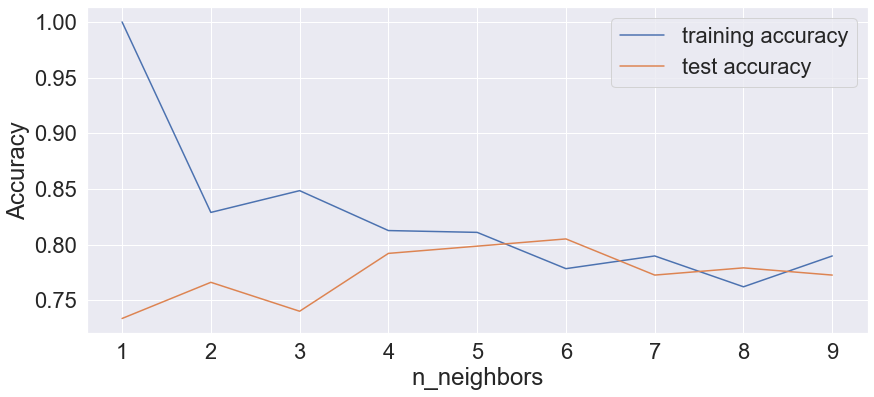

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

# Artificial Nueral Network (ANN) 

In [589]:
def     ANN_func(X,y):
        K.clear_session() 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        # keras model



        model = Sequential()
        model.add(Dense(activation = "elu", input_dim = 8, units = 10, kernel_initializer = "uniform"))
        model.add(Dropout(0.25))
        model.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform"))
        model.add(Dropout(0.25))
        model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))
        


        model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )

        
        
        
        hist=   model.fit(X_train , y_train , batch_size = 10, epochs =200, validation_split=0.2)

        clsumm = model.summary()
        cleval = model.evaluate(X_train,y_train)
        clpred = model.predict(X_train)
        clgwt  = model.get_weights()
        
        model.save("model.h5")
        print("Saved model to disk")
        network = models.load_model('model.h5')
        X_test_ann = X_test
        y_test_ann = y_test

        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5)

        return X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network , model



In [590]:
X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network, model = ANN_func(X,y)

Epoch 1/200
50/50 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.6185 - val_loss: 0.6855 - val_accuracy: 0.6829
Epoch 2/200
50/50 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5992 - val_loss: 0.6652 - val_accuracy: 0.6829
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.6530 - val_loss: 0.6051 - val_accuracy: 0.7398
Epoch 4/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.7201 - val_loss: 0.5376 - val_accuracy: 0.7642
Epoch 5/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7461 - val_loss: 0.5057 - val_accuracy: 0.7642
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7716 - val_loss: 0.4998 - val_accuracy: 0.7642
Epoch 7/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.7936 - val_loss: 0.4920 - val_accuracy: 0.7642
Epoch 8/200
5

Epoch 59/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7813 - val_loss: 0.4792 - val_accuracy: 0.7724
Epoch 60/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7916 - val_loss: 0.4790 - val_accuracy: 0.7724
Epoch 61/200
50/50 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.80 - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8125 - val_loss: 0.4798 - val_accuracy: 0.7724
Epoch 62/200
50/50 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7815 - val_loss: 0.4803 - val_accuracy: 0.7724
Epoch 63/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7956 - val_loss: 0.4786 - val_accuracy: 0.7724
Epoch 64/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7516 - val_loss: 0.4786 - val_accuracy: 0.7724
Epoch 65/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7982 - val_

50/50 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7516 - val_loss: 0.4683 - val_accuracy: 0.7724
Epoch 117/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7623 - val_loss: 0.4676 - val_accuracy: 0.7724
Epoch 118/200
50/50 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7622 - val_loss: 0.4670 - val_accuracy: 0.7724
Epoch 119/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7688 - val_loss: 0.4663 - val_accuracy: 0.7805
Epoch 120/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7885 - val_loss: 0.4655 - val_accuracy: 0.7724
Epoch 121/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7678 - val_loss: 0.4649 - val_accuracy: 0.7886
Epoch 122/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7476 - val_loss: 0.4658 - val_accuracy: 0.7886
Epoch 123/200

50/50 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7673 - val_loss: 0.4670 - val_accuracy: 0.7967
Epoch 174/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.7709 - val_loss: 0.4674 - val_accuracy: 0.7967
Epoch 175/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7580 - val_loss: 0.4648 - val_accuracy: 0.7967
Epoch 176/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7523 - val_loss: 0.4639 - val_accuracy: 0.7967
Epoch 177/200
50/50 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7567 - val_loss: 0.4634 - val_accuracy: 0.7967
Epoch 178/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7956 - val_loss: 0.4637 - val_accuracy: 0.7967
Epoch 179/200
50/50 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7534 - val_loss: 0.4637 - val_accuracy: 0.7967
Epoch 180/200

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154

How does model ANN score:
The accuracy of the model is: 0.779
The precision of the model is: 0.659
The recall of the model is: 0.574
The f1-score of the model is: 0.614
[[93 14]
 [20 27]]


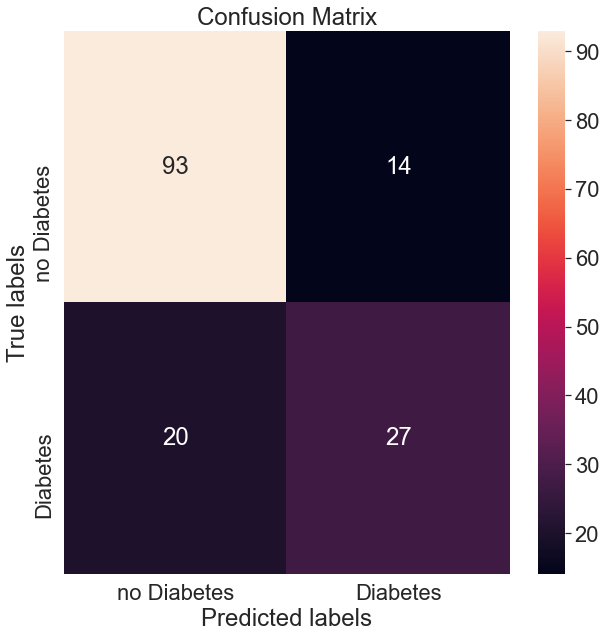

In [591]:
print(classification_report(y_test_ann, y_pred)) # output accuracy
print_evaluations(y_test_ann, y_pred, 'ANN')
   
ANN_cm =    confusion_matrix(y_test_ann, y_pred)
#ANN_score =  round(model(X_test_ann, y_test_ann)*100)
ANN_score = 80

In [ ]:
hist.history

In [ ]:
pd.DataFrame(hist.history).plot()
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('scores', fontsize=30)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
 network.summary()

# Save a list of np.arrays with the weights

In [ ]:
w = network.get_weights()

In [ ]:
#w

In [ ]:
# extract the names of the TF variables
[v.name for v in network.weights]

In [ ]:
w[0].shape

In [ ]:
# Examine the patterns of the weights 

In [ ]:
for i in range(8):
    plt.imshow(w[0][:,i].reshape((2, 4)))
    plt.show()

# Drawing a Keras model

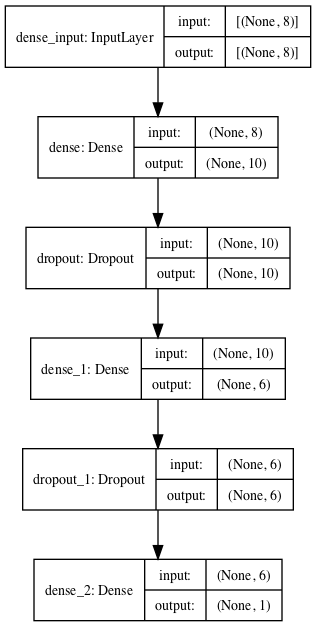

In [592]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Comapring models

In [593]:
models = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 
                                 'NB', 'SVN', 'KNN','ANN'], 
                        'score':[logReg_score, decisson_Tree_score, random_forest_score, 
                                 Naives_Bayes_score, SupportVectorMachine_score, K_NEAREST_NEIGHBORS_score, ANN_score]})

mod_scor= models.sort_values('score', ascending=False)

In [594]:
mod_scor

,model,score
6,ANN,88
0,LReg,81
5,KNN,80
3,NB,79
4,SVN,79
1,D_Tree,77
2,R.For,77


<AxesSubplot:title={'center':'Scores for each model classifier (on Diabetes)'}, xlabel='model', ylabel='score'>

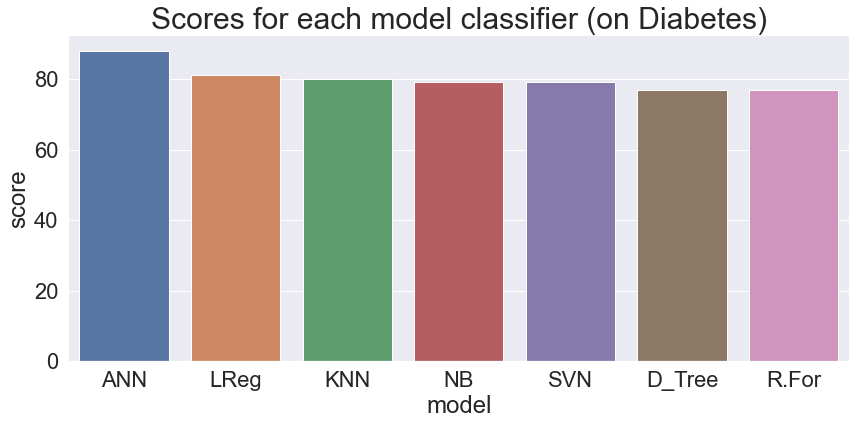

In [595]:
plt.title('Scores for each model classifier (on Diabetes)', fontsize=30)
sns.barplot(x='model', y ='score', data =mod_scor)

In [596]:
model_all = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 'NB', 'SVM', 'KNN','ANN'], 
                        'recall':[69,       80,       62,      55,    64,  57,    57],
                      'precison':[75,       78,       83,      67,   70,   68,    66],
                      'accuracy':[81,       85,       81,      79,    79,  80,    78],  
                     'cross-val':[77,       75,       76,      75,   76,   72,    80],
                         'score':[81,       76,       77,      79,   79,   80,    78],   
                         })
 
model_all.columns

Index(['model', 'recall', 'precison', 'accuracy', 'cross-val', 'score'], dtype='object')

In [597]:
m2 = model_all.sort_values(['precison'],  ascending = (False))

In [598]:
m2

,model,recall,precison,accuracy,cross-val,score
2,R.For,62,83,81,76,77
1,D_Tree,80,78,85,75,76
0,LReg,69,75,81,77,81
4,SVM,64,70,79,76,79
5,KNN,57,68,80,72,80
3,NB,55,67,79,75,79
6,ANN,57,66,78,80,78


Text(0.5, 1.0, 'Precison for each model classifier on diabetes')

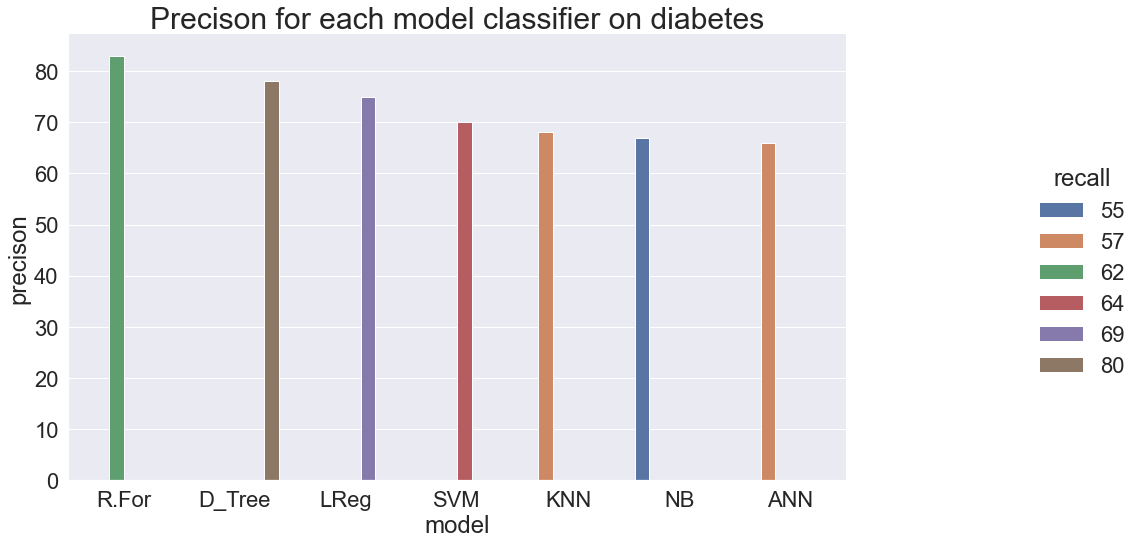

In [605]:
g = sns.catplot(x = 'model', y='precison',  hue = 'recall',data=m2,  kind='bar', )
g.fig.set_figwidth(18)
g.fig.set_figheight(8)
plt.title('Precison for each model classifier on diabetes', fontsize=30)



In [600]:
m3 = model_all.sort_values(['score'],  ascending = (False))

m3

,model,recall,precison,accuracy,cross-val,score
0,LReg,69,75,81,77,81
5,KNN,57,68,80,72,80
3,NB,55,67,79,75,79
4,SVM,64,70,79,76,79
6,ANN,57,66,78,80,78
2,R.For,62,83,81,76,77
1,D_Tree,80,78,85,75,76


Text(0.5, 1.0, 'Score for each model classifier on diabetes')

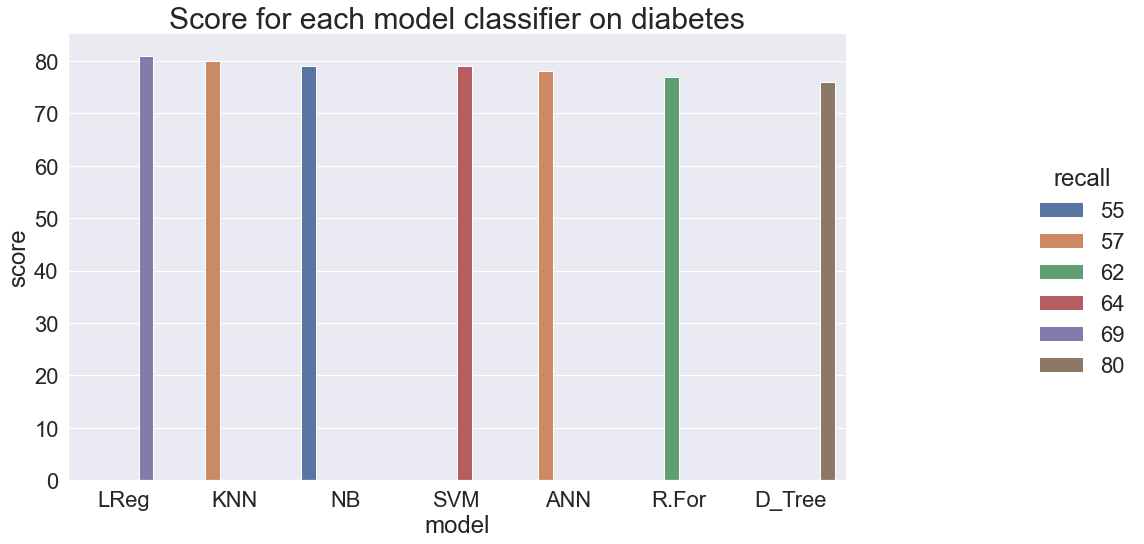

In [603]:
g = sns.catplot(x = 'model', y='score',  hue = 'recall',data=m3,  kind='bar', )

g.fig.set_figwidth(18)
g.fig.set_figheight(8)
plt.title('Score for each model classifier on diabetes', fontsize=30)



Text(0.5, 1.0, 'Accuracy for each model classifier on diabetes ')

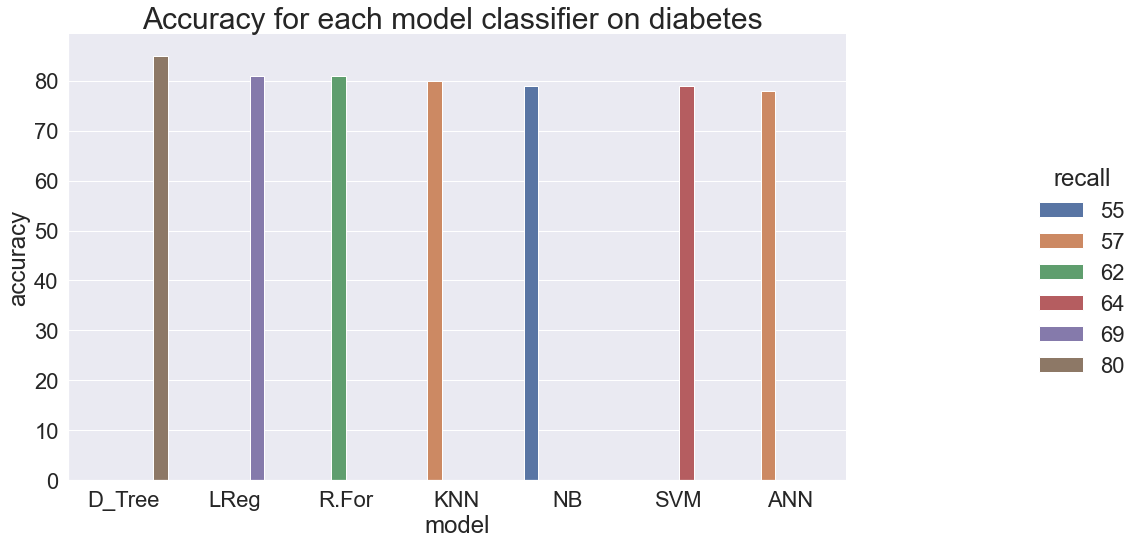

In [604]:
m4 = model_all.sort_values(['accuracy'],  ascending = (False))

#m4
g = sns.catplot(x = 'model', y='accuracy',  hue = 'recall',data=m4,  kind='bar', )

g.fig.set_figwidth(18)
g.fig.set_figheight(8)

plt.title('Accuracy for each model classifier on diabetes ', fontsize=30)

